<a href="https://colab.research.google.com/github/anasnafis77/Deteksi-Glaukoma/blob/main/Glaucoma_inference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [82]:
import cv2
import numpy as np
import pandas as pd
from tqdm import tqdm_notebook as tqdm
from matplotlib import pyplot as plt
import random

In [3]:
path = '/content/gdrive/My Drive/Drive Tugas Akhir/Kode/'

In [4]:
df = pd.read_json(path+'dataframe_new.json')

In [5]:
def CDR_calc(OD_mask, OC_mask):
  try:
    c_OD,_ = cv2.findContours(OD_mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
    p_OD = cv2.approxPolyDP(c_OD[0], 3, True)
    c_OC,_ = cv2.findContours(OC_mask, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
    p_OC = cv2.approxPolyDP(c_OC[0], 3, True)
    x_OD, y_OD, hor_OD, ver_OD = cv2.boundingRect(p_OD)
    x_OC, y_OC, hor_OC, ver_OC = cv2.boundingRect(p_OC)
    
    #x1_OD = x_OD + hor_OD
    #y1_OD = y_OD + ver_OD
    #img_tes = OD_mask.copy()
    #cv2.rectangle(img_tes,(x_OD, y_OD),(x1_OD, y1_OD), 255, 2)
    #cv2.drawContours(img_tes, c_OD, 0, 128, 3)
    #cv2.circle(img_tes, (x_OD, y_OD), 10, 128, cv2.FILLED)
    #cv2.circle(img_tes, (x1_OD, y1_OD), 10, 128, cv2.FILLED)
    #plt.figure(figsize=(10,10))
    #plt.imshow(img_tes, cmap='gray')

    VCDR = ver_OC/ver_OD # vertical CDR
    # HCDR = hor_OC/ hor_OD # Horizontal CDR
    # ACDR = np.sum(OC_mask == 255)/ np.sum(OD_mask == 255) # Area CDR
    #print('VCDR : {:.3f}'.format(VCDR))
    #print('HCDR : {:.3f}'.format(HCDR))
    #print('ACDR : {:.3f}'.format(ACDR))

  except:
    VCDR = float("nan")
  
  return VCDR

def ISNT_calc(OD_mask, OC_mask):
  NRR = OD_mask - OC_mask # Neuro Retinal Rim
  return NRR

In [108]:
VCDR_gtn = df['mean VCDR'].tolist()
gl_ix = df.index[df['tag']=='Glaucoma'].tolist()
n_ix = df.index[df['tag']=='Normal'].tolist()
dr_gl_ix = [x for x in gl_ix if x < 50]
re_gl_ix = [x for x in gl_ix if x >= 50]
dr_n_ix = [x for x in n_ix if x < 50]
re_n_ix = [x for x in n_ix if x >= 50]
print(len(dr_gl_ix)+len(dr_n_ix))
print(len(re_gl_ix)+len(re_n_ix))

50
400


In [7]:
# vertical CDR perhitungan mandiri pada mask gt
VCDR_gtm = []
VCDR_seg = []
for i in tqdm(range(len(df))):
  OD_gt = cv2.imread(df['path_OD_png'][i], 0)
  OC_gt = cv2.imread(df['path_OC_png'][i], 0)
  OD_seg = cv2.imread('/content/gdrive/My Drive/Drive Tugas Akhir/Kode/Hasil segmentasi/semantic/OD_{}.png'.format(i+1), 0)
  OC_seg = cv2.imread('/content/gdrive/My Drive/Drive Tugas Akhir/Kode/Hasil segmentasi/semantic/OC_{}.png'.format(i+1), 0)
  VCDR_gt = CDR_calc(OD_gt, OC_gt)
  VCDR_sg = CDR_calc(OD_seg, OC_seg)
  VCDR_gtm.append(VCDR_gt)
  VCDR_seg.append(VCDR_sg)

VCDR_gtm = np.array(VCDR_gtm)
VCDR_seg = np.array(VCDR_seg)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  after removing the cwd from sys.path.


In [65]:
def sorting_xy(x, y):  
  coor = list(zip(x, y))
  print(coor)
  coor.sort(key=lambda pair: pair[1])
  print(coor)
  xs, ys = zip(*coor)

  xs = list(xs)
  ys = list(ys)

  return xs, ys

**GT number VCDR**

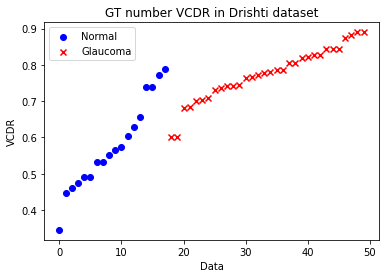

In [71]:
xo = list(range(len(dr_n_ix)))
yo = sorted(VCDR_gtn[dr_n_ix].tolist())
# xo, yo = sorting_xy(xo, yo)

xi = list(range(len(xo), len(dr_gl_ix)+len(xo)))
yi = sorted(VCDR_gtn[dr_gl_ix].tolist())
#xi, yi = sorting_xy(xi, yi)

plt.scatter(xo, yo, marker='o', color='b', label='Normal')
plt.scatter(xi, yi, marker='x', color='r', label='Glaucoma')
plt.ylabel('VCDR')
plt.xlabel('Data')
plt.title('GT number VCDR in Drishti dataset')
plt.legend()
plt.show()

**GT Mask VCDR**

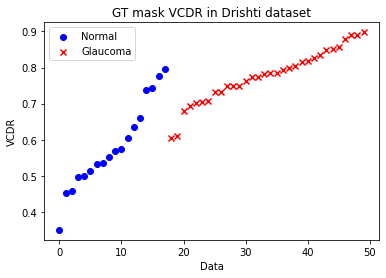

In [72]:
xo = list(range(len(dr_n_ix)))
yo = sorted(VCDR_gtm[dr_n_ix].tolist())

xi = list(range(len(xo), len(dr_gl_ix)+len(xo)))
yi = sorted(VCDR_gtm[dr_gl_ix].tolist())

plt.scatter(xo, yo, marker='o', color='b', label='Normal')
plt.scatter(xi, yi, marker='x', color='r', label='Glaucoma')
plt.ylabel('VCDR')
plt.xlabel('Data')
plt.title('GT mask VCDR in Drishti dataset')
plt.legend()
plt.show()

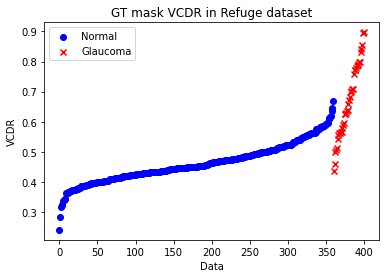

In [74]:
xo = list(range(len(re_n_ix)))
yo = sorted(VCDR_gtm[re_n_ix].tolist())

xi = list(range(len(xo), len(re_gl_ix)+len(xo)))
yi = sorted(VCDR_gtm[re_gl_ix].tolist())

plt.scatter(xo, yo, marker='o', color='b', label='Normal')
plt.scatter(xi, yi, marker='x', color='r', label='Glaucoma')
plt.ylabel('VCDR')
plt.xlabel('Data')
plt.title('GT mask VCDR in Refuge dataset')
plt.legend()
plt.show()

**Segmentation VCDR**

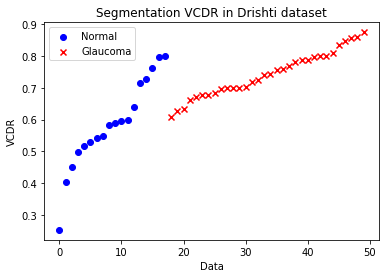

In [90]:
yo = [x for x in VCDR_seg[dr_n_ix] if np.isnan(x) == False]
yo = sorted(yo)
xo = list(range(len(yo)))

yi = [x for x in VCDR_seg[dr_gl_ix] if np.isnan(x) == False]
yi = sorted(yi)
xi = list(range(len(xo), len(xo) + len(yi)))

plt.scatter(xo, yo, marker='o', color='b', label='Normal')
plt.scatter(xi, yi, marker='x', color='r', label='Glaucoma')
plt.ylabel('VCDR')
plt.xlabel('Data')
plt.title('Segmentation VCDR in Drishti dataset')
plt.legend()
plt.show()

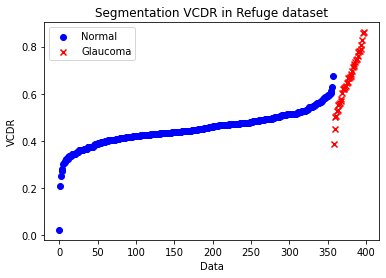

In [89]:
yo = [x for x in VCDR_seg[re_n_ix] if np.isnan(x) == False]
yo = sorted(yo)
xo = list(range(len(yo)))

yi = [x for x in VCDR_seg[re_gl_ix] if np.isnan(x) == False]
yi = sorted(yi)
xi = list(range(len(xo), len(xo) + len(yi)))

plt.scatter(xo, yo, marker='o', color='b', label='Normal')
plt.scatter(xi, yi, marker='x', color='r', label='Glaucoma')
plt.ylabel('VCDR')
plt.xlabel('Data')
plt.title('Segmentation VCDR in Refuge dataset')
plt.legend()
plt.show()

**Limit of Agreement**

GT number vs. GT mask

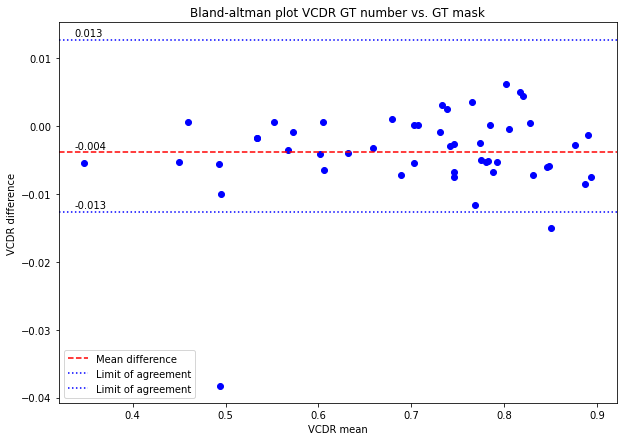

In [151]:
gtn = [x for x in VCDR_gtn if not np.isnan(x)]
gtm = VCDR_gtm[:50]
diff = gtn - gtm
rata2 = (gtn + gtm) /2
mean = np.mean(diff)
std = np.std(diff)
plt.figure(figsize=(10,7))
plt.scatter(rata2, diff, color='b')
plt.axhline(mean, color = 'r', linestyle = '--', label = 'Mean difference')
plt.axhline(1.95*std, color = 'b', linestyle = ':', label = 'Limit of agreement')
plt.axhline(-1.95*std, color = 'b', linestyle = ':', label = 'Limit of agreement')
plt.text(np.min(rata2) - 0.01, mean + 0.0005, '{:.3f}'.format(mean), size='medium')
plt.text(np.min(rata2)- 0.01, 1.95*std  + 0.0005, '{:.3f}'.format(1.95*std), size='medium')
plt.text(np.min(rata2)- 0.01, -1.95*std + 0.0005, '{:.3f}'.format(-1.95*std), size='medium')
plt.legend()
plt.title('Bland-altman plot VCDR GT number vs. GT mask')
plt.ylabel('VCDR difference')
plt.xlabel('VCDR mean')
plt.show()

GT mask vs. Segmentation

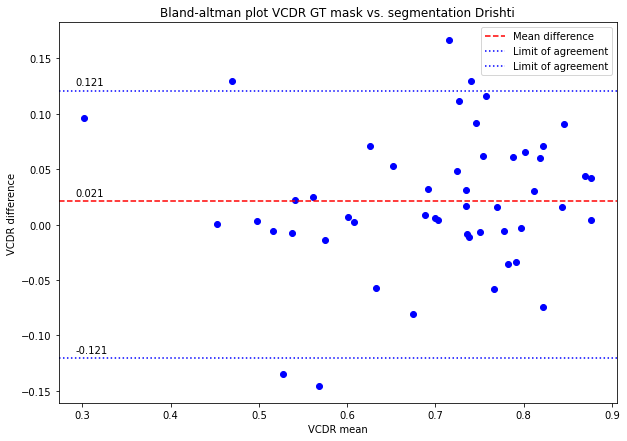

In [152]:
val1 = VCDR_gtm[:50]
val2 = VCDR_seg[:50]
diff = val1 - val2
rata2 = (val1 + val2) /2
mean = np.mean(diff)
std = np.std(diff)
plt.figure(figsize=(10,7))
plt.scatter(rata2, diff, color='b')
plt.axhline(mean, color = 'r', linestyle = '--', label = 'Mean difference')
plt.axhline(1.95*std, color = 'b', linestyle = ':', label = 'Limit of agreement')
plt.axhline(-1.95*std, color = 'b', linestyle = ':', label = 'Limit of agreement')
plt.text(np.min(rata2) - 0.01, mean + 0.005, '{:.3f}'.format(mean), size='medium')
plt.text(np.min(rata2)- 0.01, 1.95*std  + 0.005, '{:.3f}'.format(1.95*std), size='medium')
plt.text(np.min(rata2)- 0.01, -1.95*std + 0.005, '{:.3f}'.format(-1.95*std), size='medium')
plt.legend()
plt.title('Bland-altman plot VCDR GT mask vs. segmentation Drishti')
plt.ylabel('VCDR difference')
plt.xlabel('VCDR mean')
plt.show()

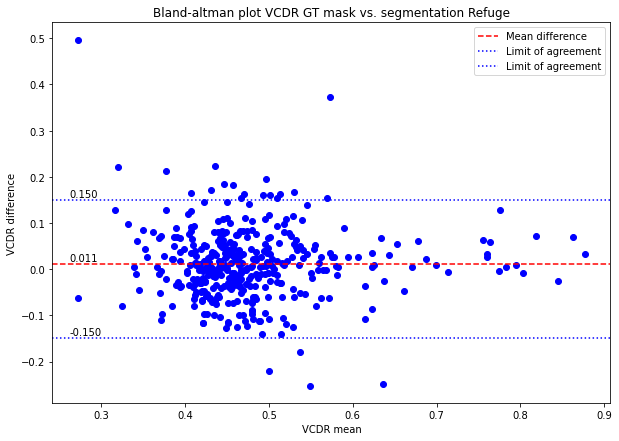

In [153]:
index = np.argwhere(np.isnan(np.array(VCDR_seg))).squeeze().tolist()
gtm = np.delete(VCDR_gtm, index)
seg = np.delete(VCDR_seg, index)

val1 = np.array(gtm[50:])
val2 = np.array(seg[50:])
diff = val1 - val2
rata2 = (val1 + val2) /2
index = np.argwhere(np.isnan(np.array(diff))).squeeze().tolist()
diff = np.delete(diff, index)
rata2 = np.delete(rata2, index)
mean = np.mean(diff)
std = np.std(diff)

plt.figure(figsize=(10,7))
plt.scatter(rata2, diff, color='b')
plt.axhline(mean, color = 'r', linestyle = '--', label = 'Mean difference')
plt.axhline(1.95*std, color = 'b', linestyle = ':', label = 'Limit of agreement')
plt.axhline(-1.95*std, color = 'b', linestyle = ':', label = 'Limit of agreement')
plt.text(np.min(rata2) - 0.01, mean + 0.007, '{:.3f}'.format(mean), size='medium')
plt.text(np.min(rata2)- 0.01, 1.95*std  + 0.007, '{:.3f}'.format(1.95*std), size='medium')
plt.text(np.min(rata2)- 0.01, -1.95*std + 0.007, '{:.3f}'.format(-1.95*std), size='medium')
plt.legend()
plt.title('Bland-altman plot VCDR GT mask vs. segmentation Refuge')
plt.ylabel('VCDR difference')
plt.xlabel('VCDR mean')
plt.show()

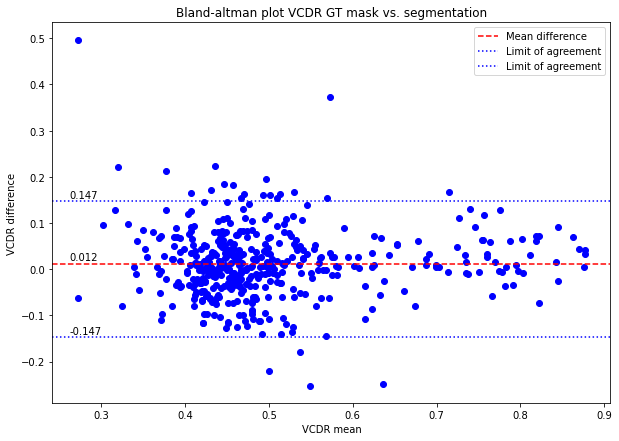

In [154]:
index = np.argwhere(np.isnan(np.array(VCDR_seg))).squeeze().tolist()
gtm = np.delete(VCDR_gtm, index)
seg = np.delete(VCDR_seg, index)

val1 = np.array(gtm)
val2 = np.array(seg)
diff = val1 - val2
rata2 = (val1 + val2) /2
index = np.argwhere(np.isnan(np.array(diff))).squeeze().tolist()
diff = np.delete(diff, index)
rata2 = np.delete(rata2, index)
mean = np.mean(diff)
std = np.std(diff)

plt.figure(figsize=(10,7))
plt.scatter(rata2, diff, color='b')
plt.axhline(mean, color = 'r', linestyle = '--', label = 'Mean difference')
plt.axhline(1.95*std, color = 'b', linestyle = ':', label = 'Limit of agreement')
plt.axhline(-1.95*std, color = 'b', linestyle = ':', label = 'Limit of agreement')
plt.text(np.min(rata2) - 0.01, mean + 0.007, '{:.3f}'.format(mean), size='medium')
plt.text(np.min(rata2)- 0.01, 1.95*std  + 0.007, '{:.3f}'.format(1.95*std), size='medium')
plt.text(np.min(rata2)- 0.01, -1.95*std + 0.007, '{:.3f}'.format(-1.95*std), size='medium')
plt.legend()
plt.title('Bland-altman plot VCDR GT mask vs. segmentation')
plt.ylabel('VCDR difference')
plt.xlabel('VCDR mean')
plt.show()

GT number vs. Segmentation

In [ ]:
val1 = [x for x in VCDR_gtn if not np.isnan(x)]
val2 = VCDR_seg[:50]
diff = val1 - val2
rata2 = (val1 + val2) /2
mean = np.mean(diff)
std = np.std(diff)
plt.figure(figsize=(10,7))
plt.scatter(rata2, diff, color='b')
plt.axhline(mean, color = 'r', linestyle = '--', label = 'mean difference')
plt.axhline(1.95*std, color = 'b', linestyle = ':', label = 'Limit of agreement')
plt.axhline(-1.95*std, color = 'b', linestyle = ':', label = 'Limit of agreement')
plt.text(np.min(rata2) - 0.01, mean + 0.002, '{:.3f}'.format(mean), size='medium')
plt.text(np.min(rata2)- 0.01, 1.95*std  + 0.002, '{:.3f}'.format(1.95*std), size='medium')
plt.text(np.min(rata2)- 0.01, -1.95*std + 0.002, '{:.3f}'.format(-1.95*std), size='medium')
plt.legend()
plt.title('Bland-altman plot VCDR GT mask vs. segmentation Drishti')
plt.ylabel('VCDR difference')
plt.xlabel('VCDR mean')
plt.show()

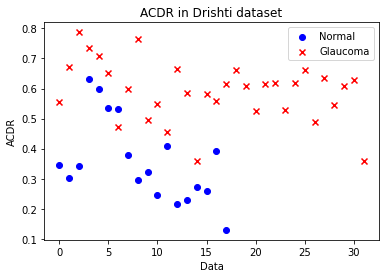

In [ ]:
plt.scatter(range(len(dr.loc[dr['tag']=='Normal'])), ACDR_gt[dr.index[dr['tag']=='Normal'].tolist()], marker='o', color='b', label='Normal')
plt.scatter( range(len(dr.loc[dr['tag']=='Glaucoma'])), ACDR_gt[dr.index[dr['tag']=='Glaucoma'].tolist()], marker='x', color='r', label='Glaucoma')
plt.ylabel('ACDR')
plt.xlabel('Data')
plt.title('ACDR in Drishti dataset')
plt.legend()
plt.show()

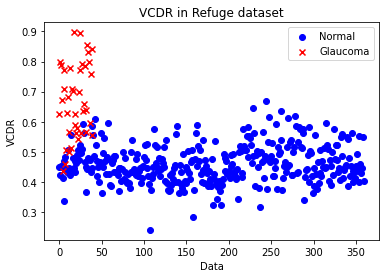

In [ ]:
plt.scatter(range(len(re.loc[re['tag']=='Normal'])), VCDR_gt[re.index[re['tag']=='Normal'].tolist()], marker='o', color='b', label='Normal')
plt.scatter( range(len(re.loc[re['tag']=='Glaucoma'])),VCDR_gt[re.index[re['tag']=='Glaucoma'].tolist()], marker='x', color='r', label='Glaucoma')
plt.ylabel('VCDR')
plt.xlabel('Data')
plt.title('VCDR in Refuge dataset')
plt.legend()
plt.show()

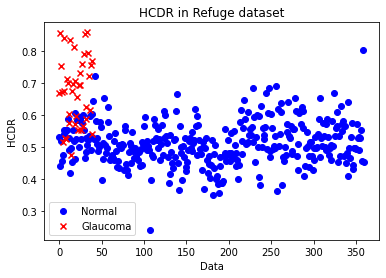

In [ ]:
plt.scatter(range(len(re.loc[re['tag']=='Normal'])), HCDR_gt[re.index[re['tag']=='Normal'].tolist()], marker='o', color='b', label='Normal')
plt.scatter( range(len(re.loc[re['tag']=='Glaucoma'])),HCDR_gt[re.index[re['tag']=='Glaucoma'].tolist()], marker='x', color='r', label='Glaucoma')
plt.ylabel('HCDR')
plt.xlabel('Data')
plt.title('HCDR in Refuge dataset')
plt.legend()
plt.show()

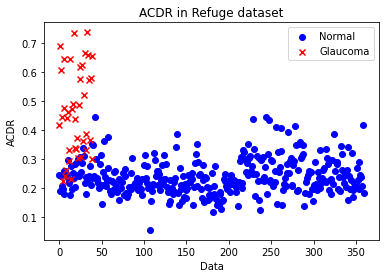

In [ ]:
plt.scatter(range(len(re.loc[re['tag']=='Normal'])), ACDR_gt[re.index[re['tag']=='Normal'].tolist()], marker='o', color='b', label='Normal')
plt.scatter( range(len(re.loc[re['tag']=='Glaucoma'])),ACDR_gt[re.index[re['tag']=='Glaucoma'].tolist()], marker='x', color='r', label='Glaucoma')
plt.ylabel('ACDR')
plt.xlabel('Data')
plt.title('ACDR in Refuge dataset')
plt.legend()
plt.show()